Python Version: 3.12.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
# ! git clone https://github.com/phipyao/ds4002-project-2
# filepath: /content/ds4002-project-2

In [4]:
df1=pd.read_csv('../DATA/cville_monthly_precip_total.csv')
df1.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,2.35,1.69,2.54,3.80,2.78,7.72,2.98,3.23,4.92,0.01,1.8,2.91,36.73
1,2001,1.92,1.01,4.34,0.95,2.94,5.29,3.38,1.26,2.76,1.49,0.78,2.14,28.26
2,2002,1.43,0.67,3.54,4.37,1.56,2.63,4.39,2.00,3.42,5.17,4.82,3.92,37.92
3,2003,2.62,7.29,4.81,4.61,7.03,6.16,6.90,6.13,10.41,3.32,4.89,4.51,68.68
4,2004,1.56,2.25,1.55,4.31,5.46,5.19,4.38,1.82,8.89,0.87,4.82,2.74,43.84


In [5]:
df2=pd.read_csv('../DATA/cville_monthly_mean_temp.csv')
df2.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,34.0,42.2,49.5,54.4,65.4,72.7,71.7,72.6,65.3,58,43.4,29.7,54.9
1,2001,35.2,40.1,43.0,56.8,62.2,71.6,71.5,75.5,64.9,55.3,52.1,42.7,55.9
2,2002,41.6,40.8,46.5,57.6,61.9,73.6,76.7,76.2,68.9,55.7,45,36.1,56.7
3,2003,31.0,34.1,47.7,55.2,61.0,69.0,74.9,75.7,66.3,55,51.2,37.1,54.9
4,2004,32.1,36.8,48.2,56.4,69.1,71.1,74.9,72.0,68.0,56.6,49,39.1,56.1


In [6]:
df3 = pd.read_csv("../DATA/cville monthly precip total v2.csv")
df3.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1893,M,M,M,3.54,M,M,M,M,M,M,M,M,M
1,1894,M,M,M,M,M,M,M,M,M,M,M,M,M
2,1895,M,M,M,M,M,M,M,M,M,M,M,M,M
3,1896,M,M,M,M,M,M,M,M,M,0.25,M,T,M
4,1897,M,M,M,M,M,M,M,M,M,M,M,M,M


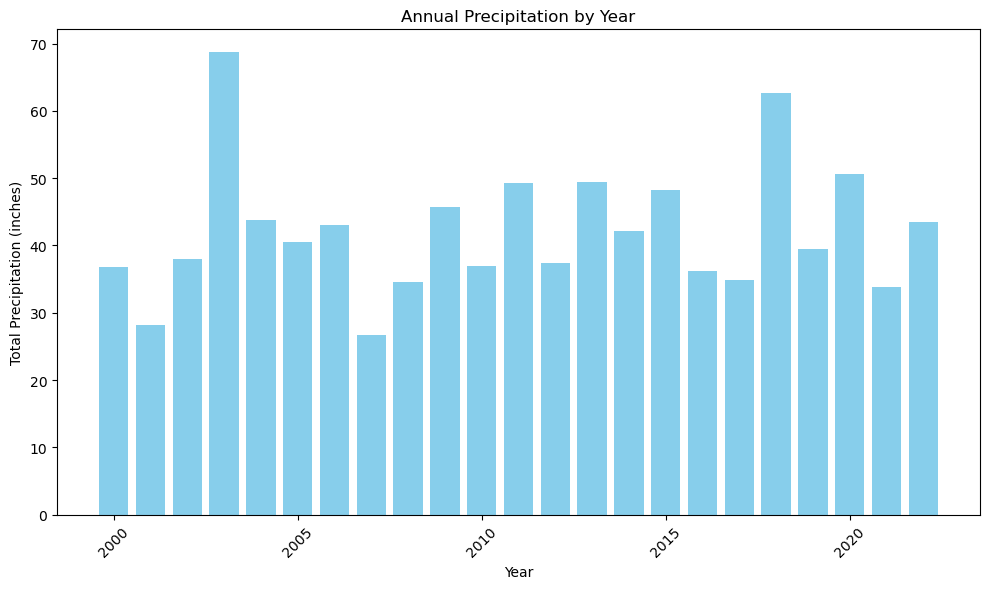

In [7]:
# Set the style for plots
plt.style.use('default')

# Convert 'Annual' to numeric for analysis data
df1['Annual'] = pd.to_numeric(df1['Annual'], errors='coerce')

# Create a bar chart for Annual Precipitation by Year
plt.figure(figsize=(10, 6))
plt.bar(df1['Year'], df1['Annual'], color='skyblue')
plt.title('Annual Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


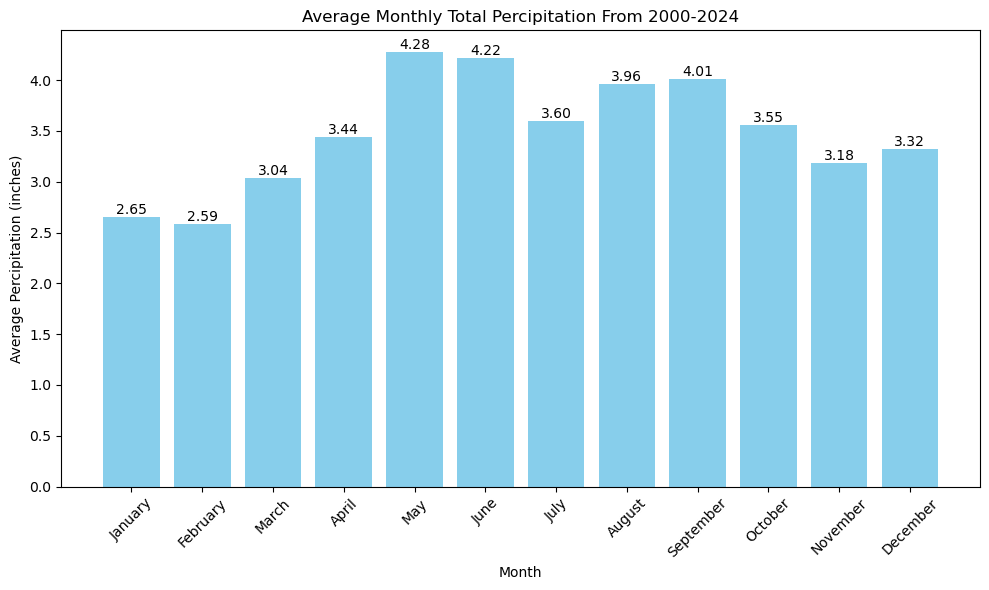

In [8]:
df1.replace('M', pd.NA, inplace=True)

# Drop annual percipitation
if 'Annual' in df1.columns:
    df1 = df1.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df1.columns[1:]:  # Skip the 'Year' column
    df1[month] = pd.to_numeric(df1[month], errors='coerce')

# Calculate the average total percipitation for each month
monthly_avg = df1.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Percipitation (inches)')
plt.title('Average Monthly Total Percipitation From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

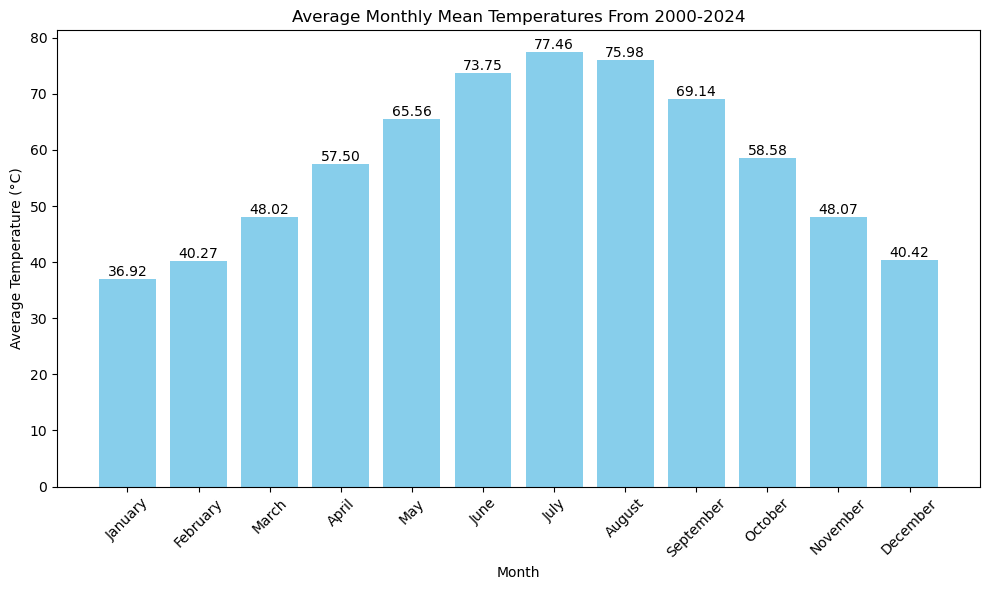

In [9]:
df2.replace('M', pd.NA, inplace=True)

# Drop annual temperature
if 'Annual' in df2.columns:
    df2 = df2.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df2.columns[1:]:  # Skip the 'Year' column
    df2[month] = pd.to_numeric(df2[month], errors='coerce')

# Calculate the average mean temperature for each month
monthly_avg = df2.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Mean Temperatures From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



   Year January February March April   May  June  July August September  \
0  1893    <NA>     <NA>  <NA>  3.54  <NA>  <NA>  <NA>   <NA>      <NA>   
1  1894    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
2  1895    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
3  1896    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   
4  1897    <NA>     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   <NA>      <NA>   

  October November December Annual  
0    <NA>     <NA>     <NA>   <NA>  
1    <NA>     <NA>     <NA>   <NA>  
2    <NA>     <NA>     <NA>   <NA>  
3    0.25     <NA>        T   <NA>  
4    <NA>     <NA>     <NA>   <NA>  


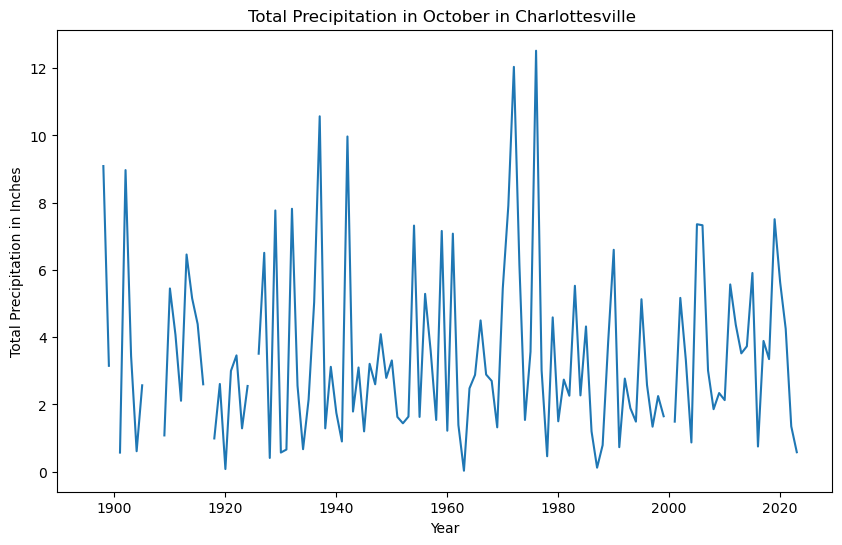

In [10]:
# Replacing "M" values with null values
df3.replace('M', pd.NA, inplace=True)

print(df3.head())
# Drop annual percipitation
if 'Annual' in df3.columns:
    df3 = df3.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df3.columns[1:]:  # Skip the 'Year' column
    df3[month] = pd.to_numeric(df3[month], errors='coerce')

df3.head()
#df3['Year'] = pd.DatetimeIndex.year(df3['Year'])
#df3.set_index('Year', inplace=True)

# Plotting time series
plt.figure(figsize=(10,6))


plt.plot(df3['Year'], df3['October'])
plt.title('Total Precipitation in October in Charlottesville ')
plt.ylabel('Total Precipitation in Inches')
plt.xlabel('Year')
plt.show()



/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_27350/2958110910.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_missing.fillna(method='ffill')


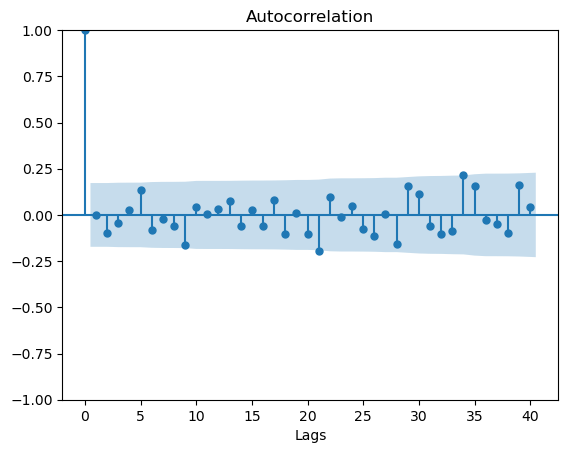

In [11]:
data_missing = df3.copy()

# Imputing missing values using forward fill method
data_filled = data_missing.fillna(method='ffill')

# ACF plot of October precipitation
october_precip = data_filled['October'].dropna().squeeze()
plot_acf(october_precip, lags=40, alpha=0.05)
plt.xlabel("Lags")
plt.show()

     Year Month  Value       Date
0    1901    01   4.46 1901-01-01
124  1901    02   0.90 1901-02-01
248  1901    03   2.45 1901-03-01
372  1901    04   9.05 1901-04-01
496  1901    05   7.66 1901-05-01


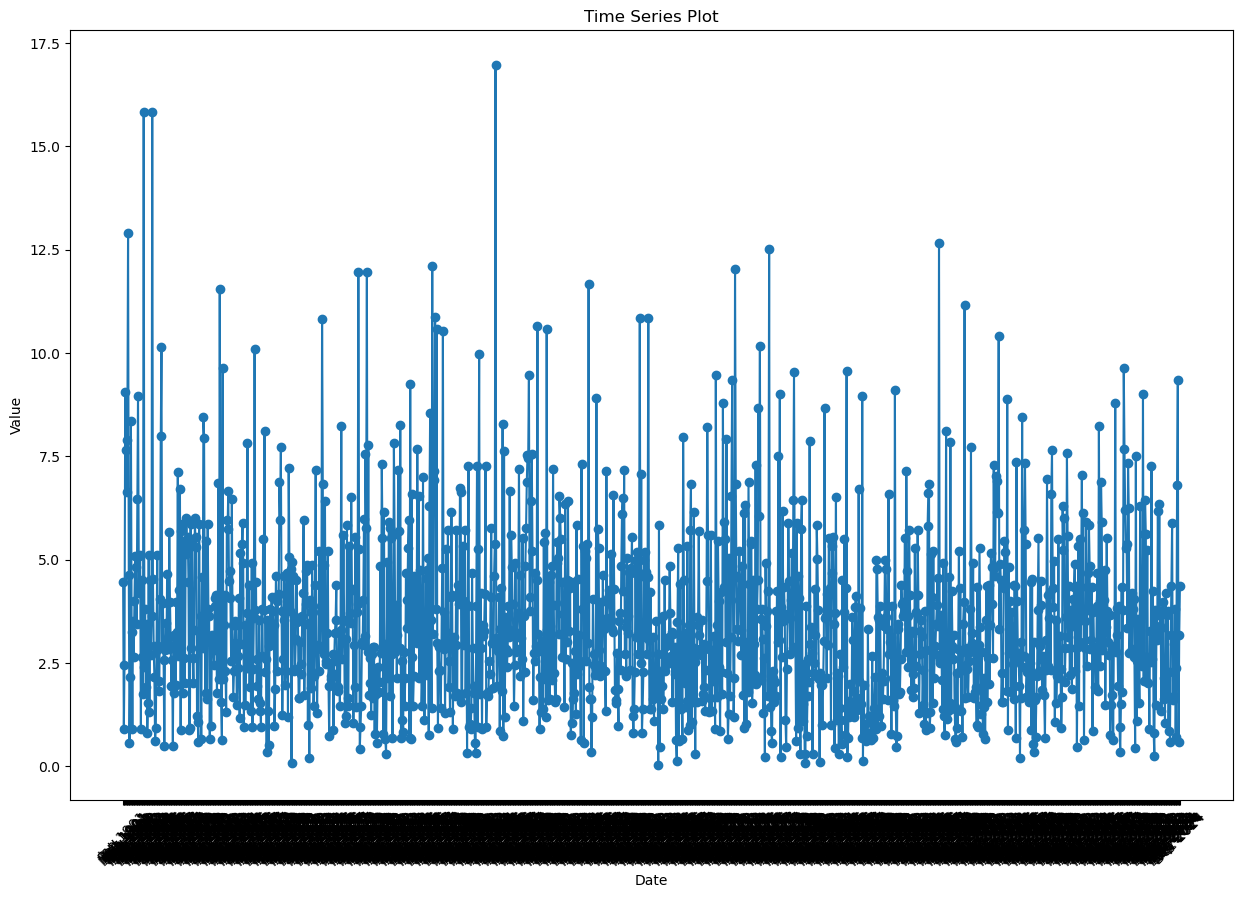

(1488, 4)

In [12]:
data_filled = data_filled.dropna()
df_long = pd.melt(data_filled, id_vars=['Year'],
                  var_name='Month',
                  value_name='Value')
# df_long = df_long[:24]
# df_long.head()
#df_long = df_long.dropna()


# Map the abbreviated month names to numbers (Jan -> 01, Feb -> 02, etc.)
month_map = {'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
             'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'}

# Convert Month abbreviations to numbers and create a Date column
df_long['Month'] = df_long['Month'].map(month_map)
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + df_long['Month'], format='%Y%m')

df_long = df_long.sort_values("Date")

# df_long = df_long[:120]
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(df_long['Date'], df_long['Value'], marker='o')

print(df_long.head())

plt.gca().set_xticks(df_long['Date'])  # Set x-axis ticks to correspond to each date
plt.gca().set_xticklabels(df_long['Date'].dt.strftime('%b %Y'))  # Format as "Month Year" (e.g., "Jan 1900")

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()
df_long.shape


In [13]:
adf_test = adfuller(df_long['Value'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])



ADF Statistic: -9.665855
p-value: 0.000000


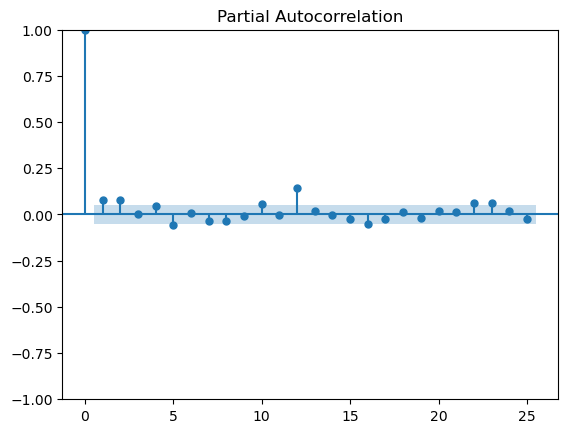

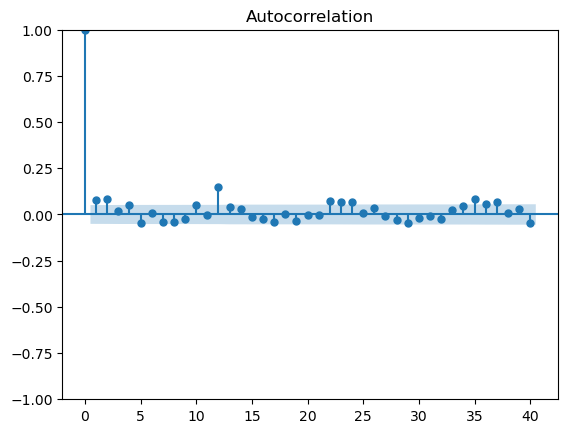

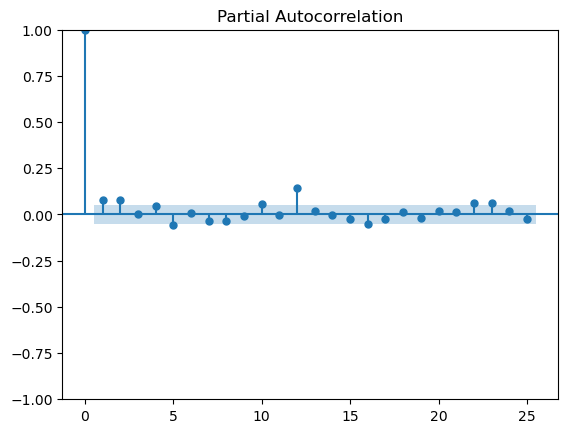

In [14]:
plot_acf(df_long['Value'], lags=40)
plot_pacf(df_long['Value'], lags=25)

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_long['Value'], order=(0, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 1488
Model:                          ARIMA   Log Likelihood               -3293.535
Date:                Wed, 23 Oct 2024   AIC                           6591.071
Time:                        11:40:48   BIC                           6601.681
Sample:                             0   HQIC                          6595.025
                               - 1488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4970      0.072     48.602      0.000       3.356       3.638
sigma2         4.8984      0.138     35.601      0.000       4.629       5.168
Ljung-Box (L1) (Q):                   9.39   Jarque-

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [41]:
df = df3
df = pd.melt(df, id_vars=['Year'], value_vars=['January','February','March','April','May','June','July','August','September','October','November','December'])

df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Drop the 'Year' and 'variable' columns if needed
df.drop(['Year', 'variable'], axis=1, inplace=True)

df = df.sort_index()

# Drop missing values
df = df.dropna()


# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df['value'])  # Replace 'October' with your preferred column
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Apply SARIMA Model
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Summary of the model
print(sarima_fit.summary())

# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Model Forecast for Precipitation")
plt.legend()
plt.show()

/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_27350/3406219264.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])


MissingDataError: exog contains inf or nans

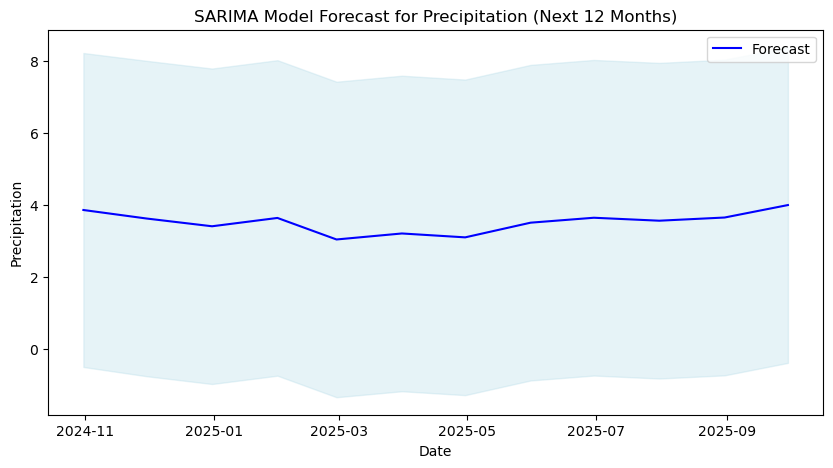

In [39]:
# Plot only the forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast_values, label='Forecast', color='blue')

# Optionally, you can fill the confidence intervals for a clearer visualization
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], 
                 color='lightblue', alpha=0.3)

# Customize the plot
plt.title("SARIMA Model Forecast for Precipitation (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

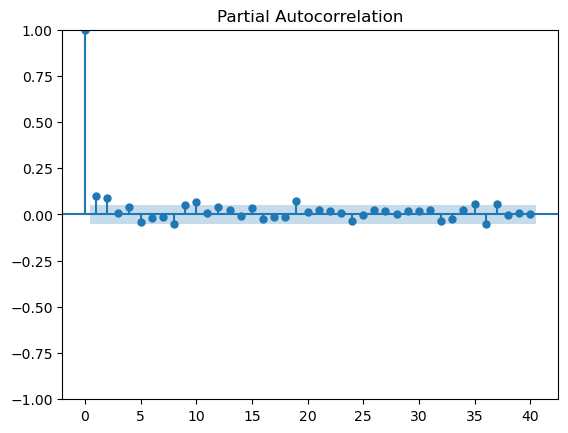

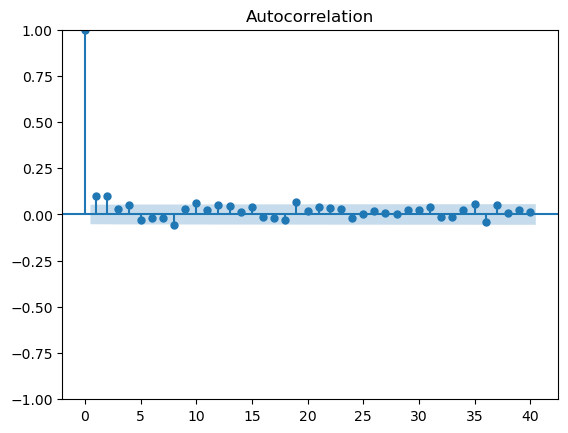

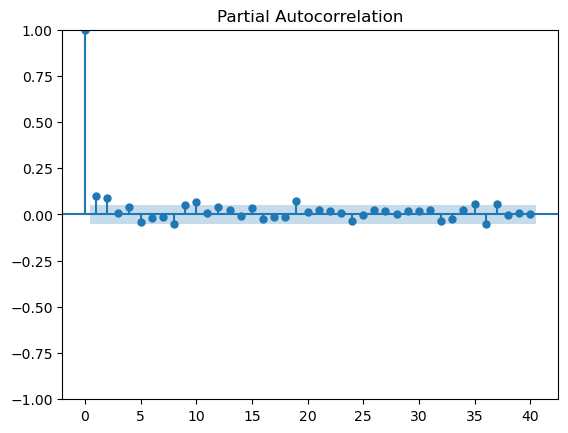

In [40]:
plot_acf(df['value'], lags=40)
plot_pacf(df['value'], lags=40)

/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_27350/2710730399.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ADF Statistic: -2.037589323231558
p-value: 0.2703384735036539
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  297
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -745.807
Date:                            Wed, 23 Oct 2024   AIC                           1501.615
Time:                                    11:41:16   BIC                           1519.860
Sample:                                01-01-2000   HQIC                          1508.930
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0336      0.067      0.502      0.6

/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_27350/2710730399.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


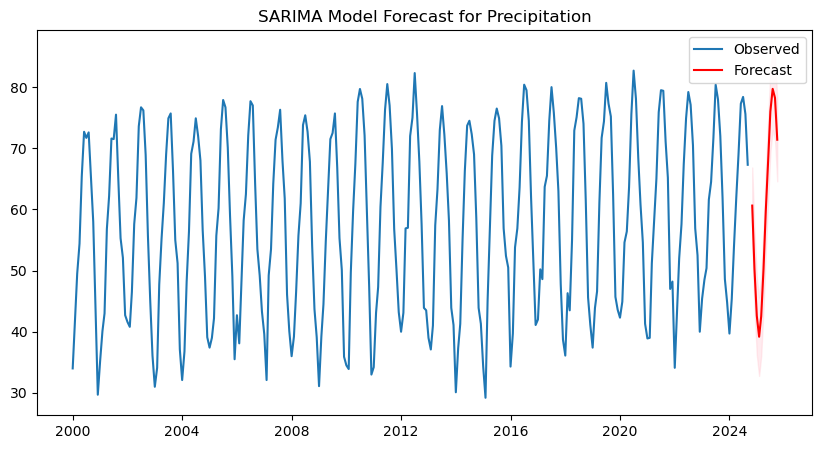

In [19]:
df = df2
df = pd.melt(df, id_vars=['Year'], value_vars=['January','February','March','April','May','June','July','August','September','October','November','December'])

df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Drop the 'Year' and 'variable' columns if needed
df.drop(['Year', 'variable'], axis=1, inplace=True)

df = df.sort_index()

# Drop missing values
df = df.dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df['value'])  # Replace 'October' with your preferred column
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Apply SARIMA Model
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Summary of the model
print(sarima_fit.summary())

# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Model Forecast for Temperature")
plt.legend()
plt.show()

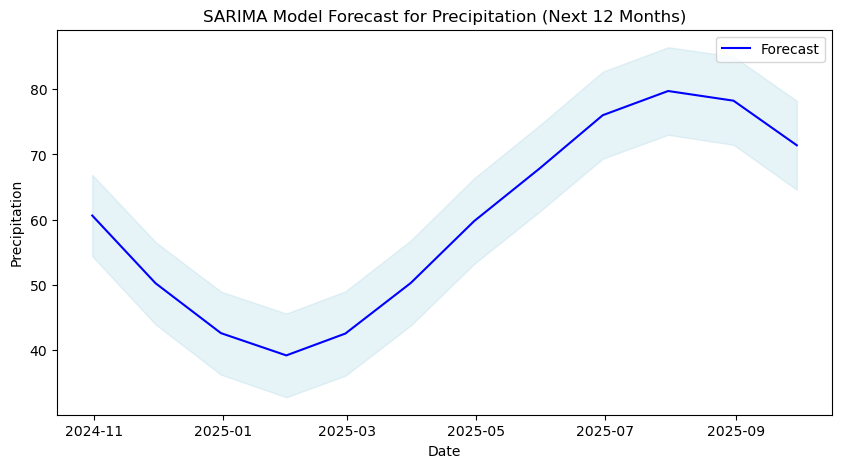

In [20]:
# Plot only the forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast_values, label='Forecast', color='blue')

# Optionally, you can fill the confidence intervals for a clearer visualization
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], 
                 color='lightblue', alpha=0.3)

# Customize the plot
plt.title("SARIMA Model Forecast for Temperature (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()